In [1]:
# Number of data points to plot
num_points = 20

# Parameter ranges below
gc_actual = 0.1
# gc = 0 will lead to singular matrix during V_th computation, so don't set to 0.
gc_lo = 0.05
gc_hi = 0.5

ggap_actual = 1.0
ggap_lo = 0
ggap_hi = 1.5

gsyn_actual = 1.0
gsyn_lo = 0
gsyn_hi = 1.5

C_actual = 0.015
# Only the last n_timesteps will be used for PCA analysis. This is to discard unstability
n_timesteps_to_analyze = 1000

In [2]:
import os
import pickle
# Load cached results
cached_result_file = 'cached_notebook_results/one_at_a_time.pkl'

if os.path.isfile(cached_result_file):
  print("Loading saved results from pickle file {}".format(cached_result_file))
  with open(cached_result_file, "rb") as f:
    gc_simulation_data, ggap_simulation_data, gsyn_simulation_data = pickle.load(f)
else:
  gc_simulation_data = []
  ggap_simulation_data = []
  gsyn_simulation_data = []
  
def save_results(gc_simulation_data, ggap_simulation_data, gsyn_simulation_data):
  with open(cached_result_file, "wb") as f:
    pickle.dump([gc_simulation_data, ggap_simulation_data, gsyn_simulation_data], f)

In [3]:
import numpy as np
import pandas as pd
import time
from neural_model import NeuralModel
from simulation_functions import *
from sklearn.decomposition import PCA
from util.analysis_util import *
from util.neuron_metadata import *
from util.plot_util import *

def gen_simulation_data(param_lo, param_hi, param_to_full_param_fcn, num_points):
  param_vals = []
  dom_amplitude_vals = []
  dom_amplitude_diff_raw_vals = []
  dom_amplitude_diff_scaled_vals = []
  dom_period_vals = []
  dimensionality_vals = []

  i = 0
  for param in np.linspace(param_lo, param_hi, num_points):
    i += 1
    start_time = time.time()
    param_vec = param_to_full_param_fcn(param)
    all_dynamics = simulate_until_stable(
      C = param_vec['C'], Gc = param_vec['Gc'], ggap = param_vec['ggap'], gsyn = param_vec['gsyn'])
    fwd_dynamics = all_dynamics[all_dynamics.shape[0] - n_timesteps_to_analyze:,:]
    elapsed_time = time.time() - start_time
    print("Iteration {0}/{1} for param {2:.4f} took {3:.2f}s".format(i, num_points, param, elapsed_time))

    n = fwd_dynamics.shape[0]
    X = fwd_dynamics - fwd_dynamics.mean(axis = 0)
    pca = PCA()
    projected_X = pca.fit_transform(fwd_dynamics)
    dom_mode = projected_X[:,0]
    dom_amplitude = get_amplitude(dom_mode)
    dom_amplitude_diff_raw, dom_amplitude_diff_scaled = get_amplitude_differences(dom_mode)
    dom_period = get_period(dom_mode)
    eigen_vals = get_eigenvalues_from_pca(pca, n)
    dimensionality = get_dimensionality(eigen_vals)

    param_vals.append(param)
    dom_amplitude_vals.append(dom_amplitude)
    dom_amplitude_diff_raw_vals.append(dom_amplitude_diff_raw)
    dom_amplitude_diff_scaled_vals.append(dom_amplitude_diff_scaled)
    dom_period_vals.append(dom_period)
    dimensionality_vals.append(dimensionality)
  return (param_vals, dom_amplitude_vals, dom_amplitude_diff_raw_vals,
          dom_amplitude_diff_scaled_vals, dom_period_vals, dimensionality_vals)

def plot_simulation_results(param_vals, dom_amplitude_vals,
                            dom_amplitude_diff_raw_vals, dom_amplitude_diff_scaled_vals,
                            dom_period_vals, dimensionality_vals):
  fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
  ax = axes[0]
  ax.scatter(param_vals, dom_amplitude_vals)
  ax.set_title("Dom amplitude")
  ax = axes[1]
  ax.scatter(param_vals, dom_amplitude_diff_raw_vals)
  ax.set_title("Dom amplitude diff raw")
  ax = axes[2]
  ax.scatter(param_vals, dom_amplitude_diff_scaled_vals)
  ax.set_title("Dom amplitude diff scaled")
  ax = axes[3]
  ax.scatter(param_vals, dom_period_vals)
  ax.set_title("Dom period")
  ax = axes[4]
  ax.scatter(param_vals, dimensionality_vals)
  ax.set_title("Dimensionality")
  return fig

# Gc tweaks

Simulation length 1000.00, raw amplitude diff 4578.72, scaled amplitude diff 37.64, amplitude 37.64
Simulation length 2000.00, raw amplitude diff 2.51, scaled amplitude diff 0.01, amplitude 0.01
Iteration 1/20 for param 0.0500 took 3.66s
Simulation length 1000.00, raw amplitude diff 4476.14, scaled amplitude diff 41.36, amplitude 41.36
Simulation length 2000.00, raw amplitude diff 1.50, scaled amplitude diff 0.01, amplitude 0.01
Iteration 2/20 for param 0.0737 took 2.89s
Simulation length 1000.00, raw amplitude diff 4367.11, scaled amplitude diff 44.57, amplitude 44.57
Simulation length 2000.00, raw amplitude diff 2.23, scaled amplitude diff 0.01, amplitude 0.01
Iteration 3/20 for param 0.0974 took 3.00s
Simulation length 1000.00, raw amplitude diff 4264.20, scaled amplitude diff 47.19, amplitude 47.19
Simulation length 2000.00, raw amplitude diff 1.43, scaled amplitude diff 0.01, amplitude 0.01
Iteration 4/20 for param 0.1211 took 2.77s
Simulation length 1000.00, raw amplitude diff 41

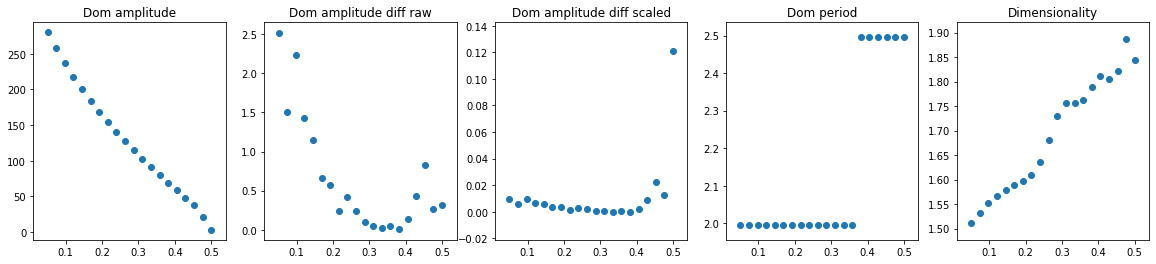

In [4]:
def gc_to_full_param(gc):
  return {
    'C': C_actual,
    'Gc': gc,
    'ggap': ggap_actual,
    'gsyn': gsyn_actual
  }

if len(gc_simulation_data) == 0:
  gc_simulation_data = gen_simulation_data(gc_lo, gc_hi, gc_to_full_param, num_points)
  save_results(gc_simulation_data, ggap_simulation_data, gsyn_simulation_data)
fig = plot_simulation_results(*gc_simulation_data)

# Ggap tweaks

Simulation length 1000.00, raw amplitude diff 997.74, scaled amplitude diff 16438.85, amplitude 16438.85
Simulation length 2000.00, raw amplitude diff 0.19, scaled amplitude diff 1.37, amplitude 1.37
Iteration 1/20 for param 0.0000 took 1.42s
Simulation length 1000.00, raw amplitude diff 3101.80, scaled amplitude diff 54.07, amplitude 54.07
Simulation length 2000.00, raw amplitude diff 0.02, scaled amplitude diff 0.00, amplitude 0.00
Iteration 2/20 for param 0.0789 took 3.03s
Simulation length 1000.00, raw amplitude diff 3422.39, scaled amplitude diff 1301.65, amplitude 1301.65
Simulation length 2000.00, raw amplitude diff 0.00, scaled amplitude diff 1.50, amplitude 1.50
Iteration 3/20 for param 0.1579 took 1.76s
Simulation length 1000.00, raw amplitude diff 3671.03, scaled amplitude diff 23753.88, amplitude 23753.88
Simulation length 2000.00, raw amplitude diff 0.00, scaled amplitude diff 4.58, amplitude 4.58
Iteration 4/20 for param 0.2368 took 1.46s
Simulation length 1000.00, raw am

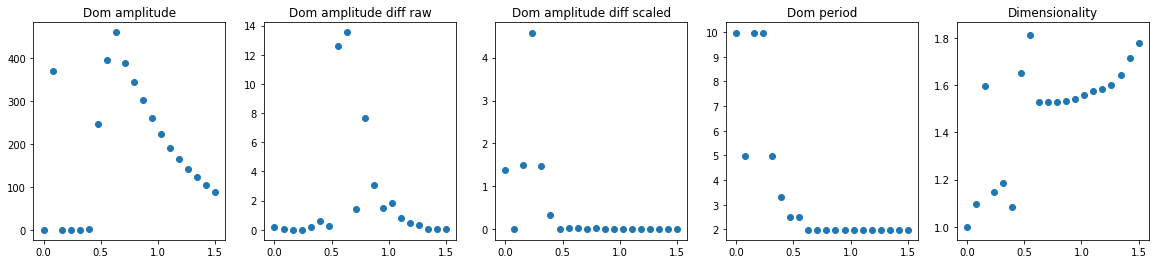

In [5]:
def ggap_to_full_param(ggap):
  return {
    'C': C_actual,
    'Gc': gc_actual,
    'ggap': ggap,
    'gsyn': gsyn_actual
  }

if len(ggap_simulation_data) == 0:
  ggap_simulation_data = gen_simulation_data(ggap_lo, ggap_hi, ggap_to_full_param, num_points)
  save_results(gc_simulation_data, ggap_simulation_data, gsyn_simulation_data)
fig = plot_simulation_results(*ggap_simulation_data)

# Gsyn tweaks

Simulation length 1000.00, raw amplitude diff 7898.12, scaled amplitude diff 2376727.83, amplitude 2376727.83
Simulation length 2000.00, raw amplitude diff 0.00, scaled amplitude diff 0.33, amplitude 0.33
Iteration 1/20 for param 0.0000 took 1.01s
Simulation length 1000.00, raw amplitude diff 12509.23, scaled amplitude diff 9959.16, amplitude 9959.16
Simulation length 2000.00, raw amplitude diff 0.09, scaled amplitude diff 6.86, amplitude 6.86
Iteration 2/20 for param 0.0789 took 1.93s
Simulation length 1000.00, raw amplitude diff 11208.36, scaled amplitude diff 90189.14, amplitude 90189.14
Simulation length 2000.00, raw amplitude diff 0.00, scaled amplitude diff 5.49, amplitude 5.49
Iteration 3/20 for param 0.1579 took 1.62s
Simulation length 1000.00, raw amplitude diff 9877.32, scaled amplitude diff 31396.00, amplitude 31396.00
Simulation length 2000.00, raw amplitude diff 0.00, scaled amplitude diff 0.29, amplitude 0.29
Iteration 4/20 for param 0.2368 took 1.70s
Simulation length 10

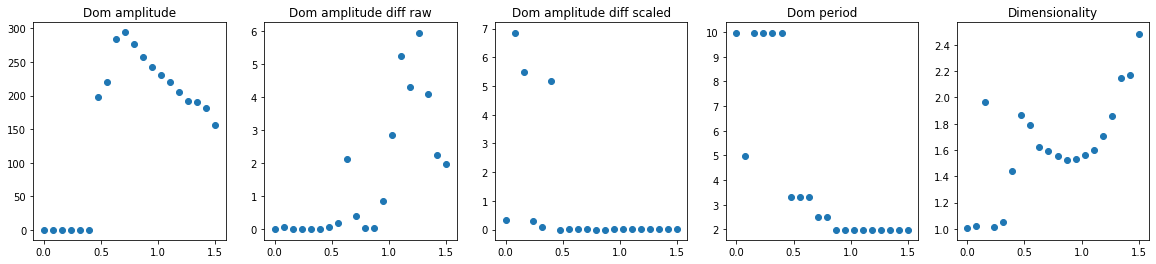

In [6]:
def gsyn_to_full_param(gsyn):
  return {
    'C': C_actual,
    'Gc': gc_actual,
    'ggap': ggap_actual,
    'gsyn': gsyn
  }


if len(gsyn_simulation_data) == 0:
  gsyn_simulation_data = gen_simulation_data(gsyn_lo, gsyn_hi, gsyn_to_full_param, num_points)
  save_results(gc_simulation_data, ggap_simulation_data, gsyn_simulation_data)
fig = plot_simulation_results(*gsyn_simulation_data)